# TP 3 : Méthodes d'agrégation

1. Récupérer vos données du TP2, et préparer vos dataframes `X_train`, `y_train`, `X_test`, `y_test`.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Chargement des données
data = pd.read_csv('data/horse_clean.csv')

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns=['surgical_lesion_yes']),
    data['surgical_lesion_yes'],
    test_size=0.2,
    random_state=42
)

In [5]:
from sklearn.tree import DecisionTreeClassifier
# max_depth : profondeur maximale de l'arbre
# min_samples_split : nombre minimal d'observations pour pouvoir spliter un noeud
# min_samples_leaf : nombre minimal d'observations pour pouvoir créer un noeud
# splitter : critère de split
# random_state : graine pour la reproductibilité

# On instancie notre modèle
tree = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    splitter='best',
    random_state=42,
    )

# On entraine notre modèle
tree.fit(X_train, y_train)

# On prédit les valeurs de y pour X_test
y_pred = tree.predict(X_test)

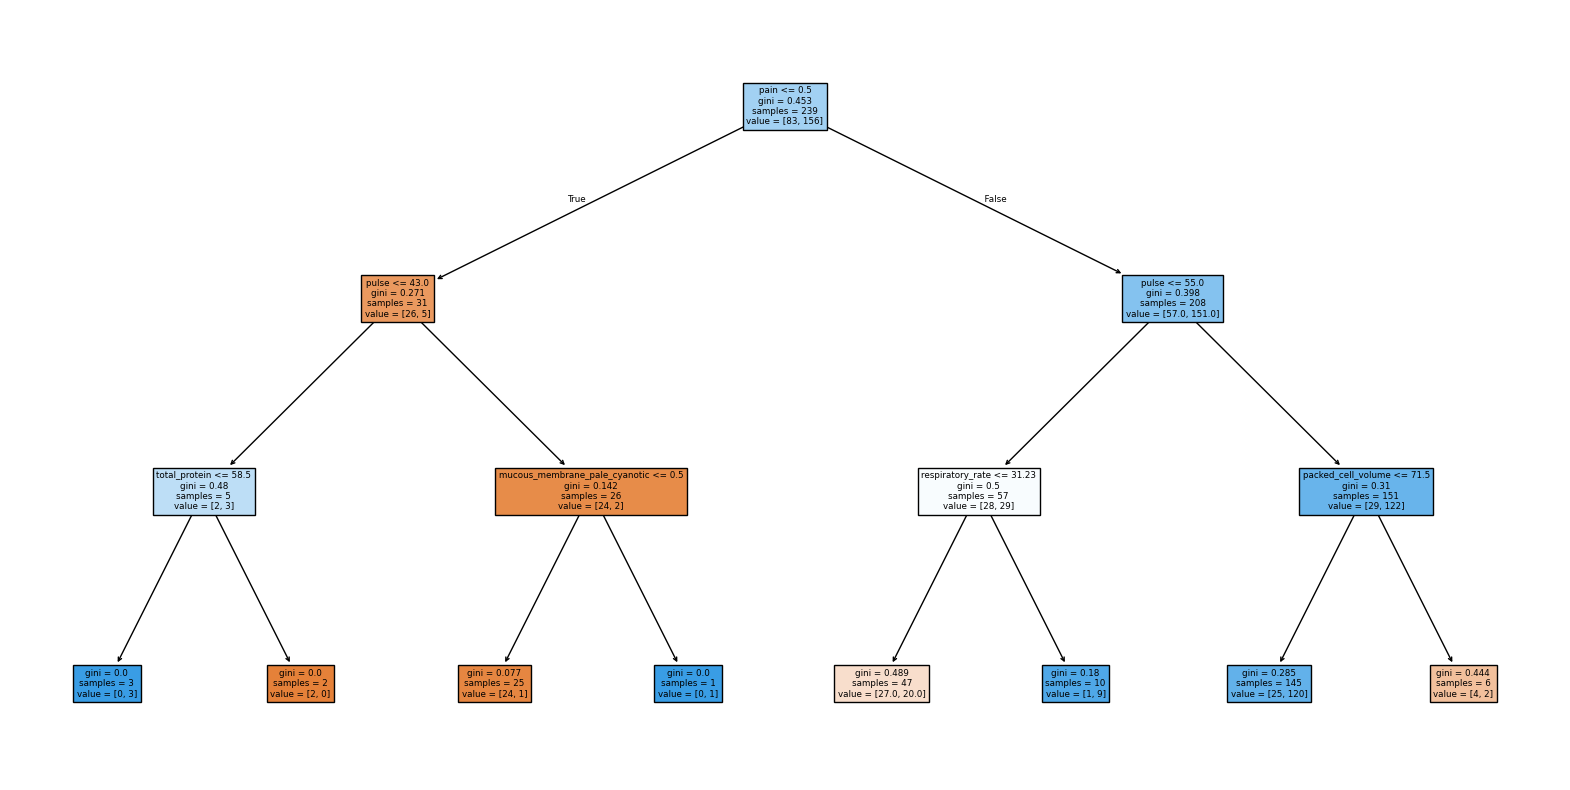

In [7]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

# On affiche l'arbre
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X_train.columns)
plt.show()

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("score :",tree.score(X_test, y_test))

# On crée une matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("Matrice confusion : \n",cm)

# On affiche le rapport de classification
print(classification_report(y_test, y_pred))

score : 0.65
Matrice confusion : 
 [[10 16]
 [ 5 29]]
              precision    recall  f1-score   support

       False       0.67      0.38      0.49        26
        True       0.64      0.85      0.73        34

    accuracy                           0.65        60
   macro avg       0.66      0.62      0.61        60
weighted avg       0.65      0.65      0.63        60



#### Bagging (Random Forest)

On va maintenant utiliser un modèle de bagging : le [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

Entrainez et évaluez un modèle de Random Forest.

In [9]:
from sklearn.ensemble import RandomForestClassifier

# On crée notre modèle
rf = RandomForestClassifier(n_estimators=100,
                            max_depth=3,
                            min_samples_split=2,
                            min_samples_leaf=1,
                            random_state=42)

# On entraine notre modèle
rf.fit(X_train, y_train)

# On prédit les valeurs de la variable cible pour les données de test
y_pred = rf.predict(X_test)

In [4]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score,\
    confusion_matrix, classification_report,ConfusionMatrixDisplay
#création d'une fonction d'évaluation

def evaluate_model(model, X_test, y_test):
    # On prédit les valeurs de la variable cible pour les données de test
    y_pred = model.predict(X_test)

    # On calcule l'accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: %.2f' % accuracy)

    # On calcule la matrice de confusion
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    
    # On calcule le rapport de classification

    report = classification_report(y_test, y_pred)
    print(report)    
    return None

Accuracy: 0.68
              precision    recall  f1-score   support

       False       0.89      0.31      0.46        26
        True       0.65      0.97      0.78        34

    accuracy                           0.68        60
   macro avg       0.77      0.64      0.62        60
weighted avg       0.75      0.68      0.64        60



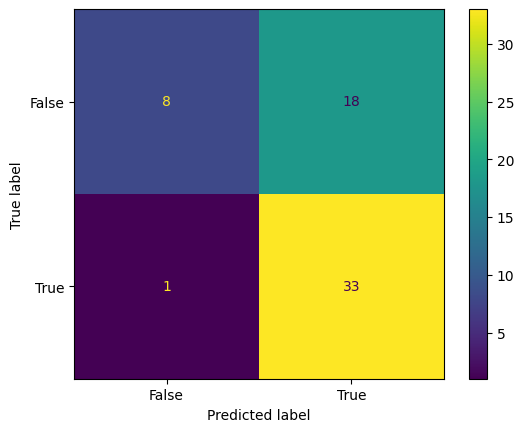

In [11]:
evaluate_model(rf, X_test, y_test)

#### Bagging

On va maintenant utiliser un modèle de bagging : [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html).

Accuracy: 0.70
              precision    recall  f1-score   support

       False       0.83      0.38      0.53        26
        True       0.67      0.94      0.78        34

    accuracy                           0.70        60
   macro avg       0.75      0.66      0.65        60
weighted avg       0.74      0.70      0.67        60



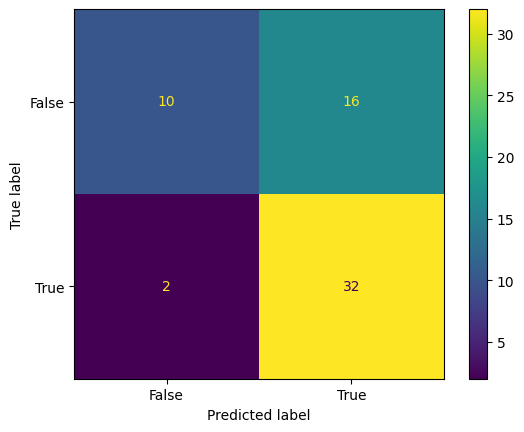

In [20]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# On crée notre modèle
bag = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                         n_estimators=1000,
                         random_state=42)

# On entraine notre modèle
bag.fit(X_train, y_train)

evaluate_model(bag, X_test, y_test)

Accuracy: 0.55
              precision    recall  f1-score   support

       False       0.33      0.04      0.07        26
        True       0.56      0.94      0.70        34

    accuracy                           0.55        60
   macro avg       0.45      0.49      0.39        60
weighted avg       0.46      0.55      0.43        60



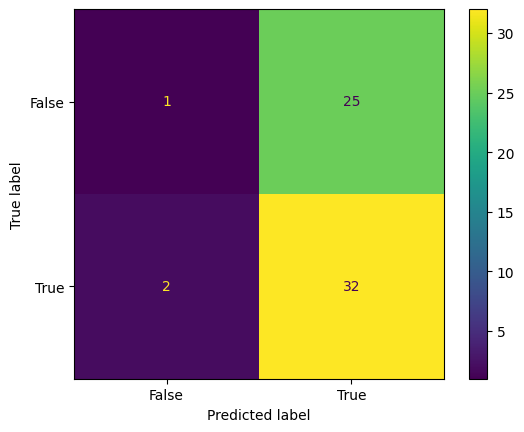

In [14]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

# On crée notre modèle
bag = BaggingClassifier(estimator=SVC(probability=True),
                         n_estimators=100,
                         random_state=42)

# On entraine notre modèle
bag.fit(X_train, y_train)

evaluate_model(bag, X_test, y_test)


### Boosting (AdaBoost)

Entrainez et évaluez un modèle d'[AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html).

Accuracy: 0.67
              precision    recall  f1-score   support

       False       0.71      0.38      0.50        26
        True       0.65      0.88      0.75        34

    accuracy                           0.67        60
   macro avg       0.68      0.63      0.62        60
weighted avg       0.68      0.67      0.64        60



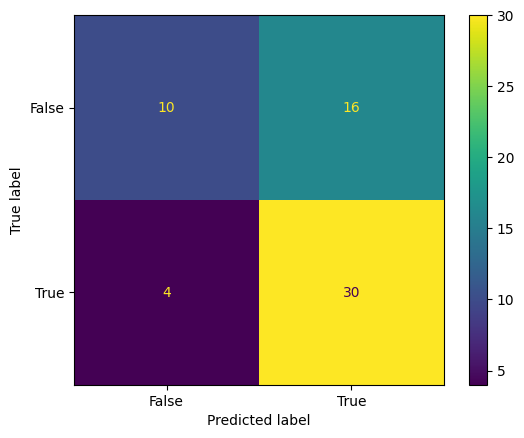

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# On crée notre modèle
adb = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                            n_estimators=100,
                            random_state=42)

# On entraine notre modèle
adb.fit(X_train, y_train)

evaluate_model(adb, X_test, y_test)

#### Boosting (Gradient Boosting)

Entrainez et évaluez un modèle de boosting avec la fonction [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) de sklearn.

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
# On crée notre modèle
gb = GradientBoostingClassifier(n_estimators=1000,
                                random_state=42,
                                learning_rate=0.1,
                                max_depth=3,
                                min_samples_split=2,
                                min_samples_leaf=1)

# On entraine notre modèle
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

# On prédit les valeurs de la variable cible pour les données de test
print("F1 score Train: ", f1_score(y_train, gb.predict(X_train)))

# On prédit les valeurs de la variable cible pour les données de test
print("F1 score Test: ", f1_score(y_test, y_pred))

F1 score Train:  0.9936305732484076
F1 score Test:  0.7631578947368421


Accuracy: 0.70
              precision    recall  f1-score   support

       False       0.72      0.50      0.59        26
        True       0.69      0.85      0.76        34

    accuracy                           0.70        60
   macro avg       0.71      0.68      0.68        60
weighted avg       0.70      0.70      0.69        60



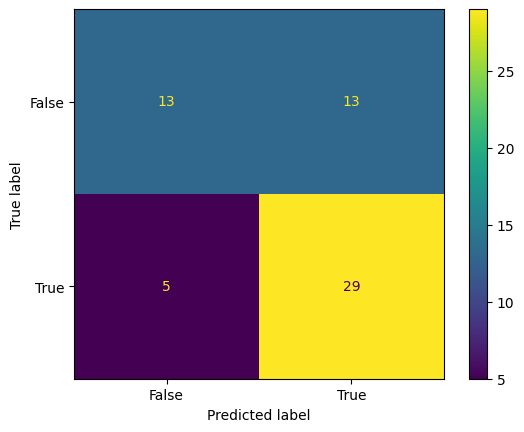

In [19]:
evaluate_model(gb, X_test, y_test)

#### xgboost

Entrainez et évaluez un modèle de boosting avec la fonction [XGBClassifier](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier) de xgboost.

Accuracy: 0.68
              precision    recall  f1-score   support

       False       0.71      0.46      0.56        26
        True       0.67      0.85      0.75        34

    accuracy                           0.68        60
   macro avg       0.69      0.66      0.66        60
weighted avg       0.69      0.68      0.67        60



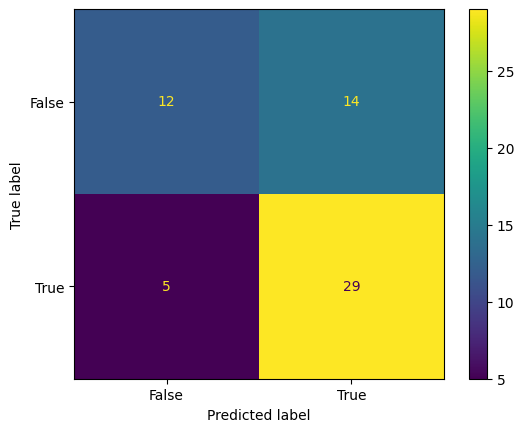

In [17]:
from xgboost import XGBClassifier

# On crée notre modèle
xgb = XGBClassifier(n_estimators=1000,
                    random_state=42,
                    learning_rate=0.1,
                    max_depth=3)

# On entraine notre modèle
xgb.fit(X_train, y_train)

evaluate_model(xgb, X_test, y_test)

Explorez les hyperparamètres de ces modèles.
Essayez de comprendre l'impact de ces hyperparamètres sur les performances des modèles, ainsi que sur le temps d'entrainement.
Vous pouvez vous aider de la [documentation de sklearn](https://scikit-learn.org/stable/modules/ensemble.html) et de [cette page](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_iris.html) pour le Random Forest.

## Questions
1. Comment évoluent les performance des modèles en fonction des hyperparamètres ?
2. Quel est le modèle qui performe le mieux sur vos données ?
3. Comment évolue le temps d'entrainement en fonction des hyperparamètres ?


## Bonus
- Essayez d'afficher l'importance des features avec la fonction `feature_importances_` de sklearn.
- Essayez d'utiliser la validation croisée pour évaluer vos modèles.


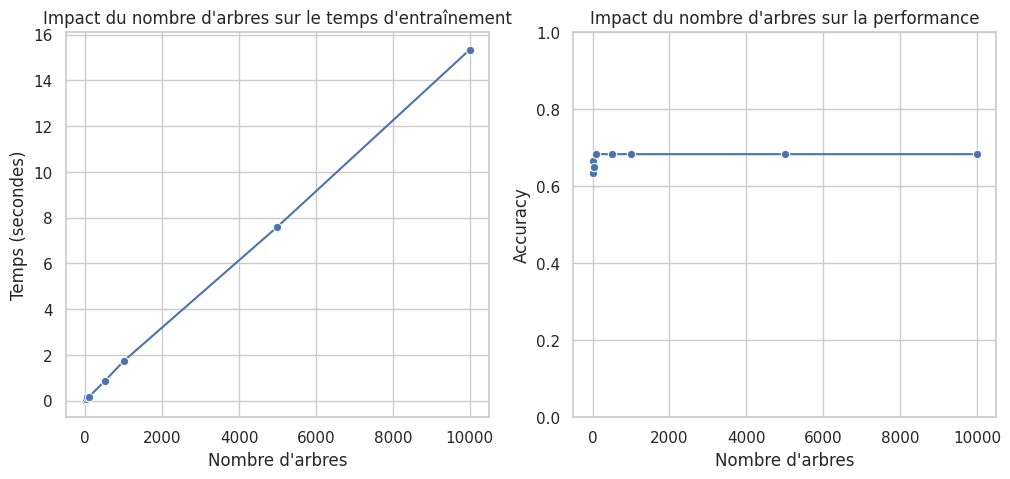

In [18]:
import timeit
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from matplotlib import pyplot as plt
# Étude de l'impact du nombre d'arbres sur la performance et le temps

n_estimators = [1, 10, 50, 100, 500, 1000, 5000, 10000]
times = []
accuracies = []
for n in n_estimators:
    rf = RandomForestClassifier(n_estimators=n,
                                max_depth=3,
                                random_state=42,
                                n_jobs=-1)
    start_time = timeit.default_timer()
    rf.fit(X_train, y_train)
    end_time = timeit.default_timer()
    times.append(end_time - start_time)
    accuracies.append(rf.score(X_test, y_test))

# Affichage des résultats

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.lineplot(x=n_estimators, y=times, marker='o')
plt.title('Impact du nombre d\'arbres sur le temps d\'entraînement')
plt.xlabel('Nombre d\'arbres')
plt.ylabel('Temps (secondes)')
plt.subplot(1, 2, 2)
sns.lineplot(x=n_estimators, y=accuracies, marker='o')
plt.title('Impact du nombre d\'arbres sur la performance')
plt.xlabel('Nombre d\'arbres')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


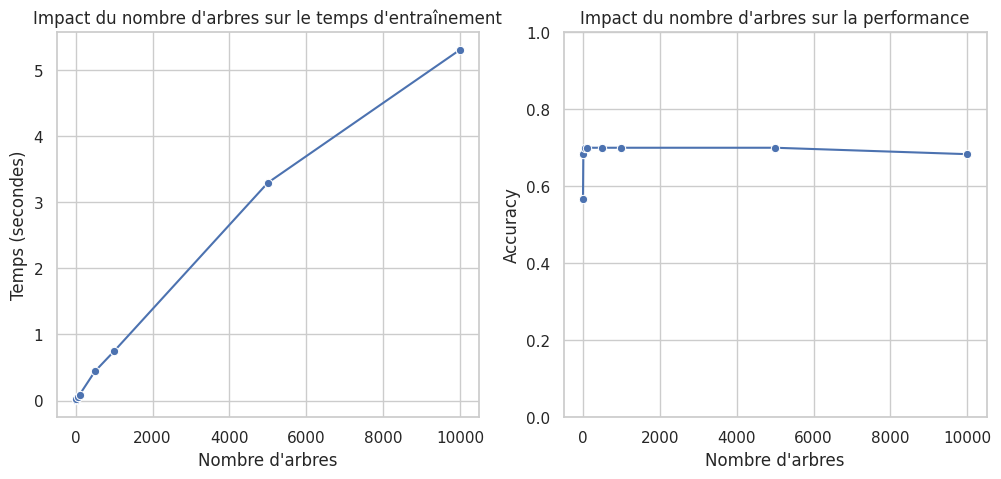

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

n_estimators = [1, 10, 50, 100, 500, 1000, 5000, 10000]
times = []
accuracies = []
for n in n_estimators:
    gboost = GradientBoostingClassifier(n_estimators=n,
                                random_state=42,
                                learning_rate=0.1,
                                max_depth=3)
    start_time = timeit.default_timer()
    gboost.fit(X_train, y_train)
    end_time = timeit.default_timer()
    times.append(end_time - start_time)
    accuracies.append(gboost.score(X_test, y_test))

# Affichage des résultats

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.lineplot(x=n_estimators, y=times, marker='o')
plt.title('Impact du nombre d\'arbres sur le temps d\'entraînement')
plt.xlabel('Nombre d\'arbres')
plt.ylabel('Temps (secondes)')
plt.subplot(1, 2, 2)
sns.lineplot(x=n_estimators, y=accuracies, marker='o')
plt.title('Impact du nombre d\'arbres sur la performance')
plt.xlabel('Nombre d\'arbres')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


En comparant les résultats on peut voir clairement le rapport linéaire entre le nombre d'estimateurs et le temps d'entrainement.
Cependant, on remarque que la performance des modèles n'augmente pas linéairement avec le nombre d'estimateurs.

Autre point point interessant, on voit clairement le sur-apprentissage sur le modèle de gradient boosting, qui n'apparaissait pas sur le random forest.